In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [2]:
def show(image):
    # Helper-method to show an image
    return plt.imshow(image, cmap="gray", norm=NoNorm())

In [3]:
base = """
5 2 6 2 3 2 1 2 3 1
1 3 6 7 9 2 4 4 7 1
1 5 8 8 10 17 21 19 9 4
4 18 34 56 17 25 38 17 7 2
1 14 22 43 68 91 62 23 16 7
6 12 21 21 39 87 76 34 4 2
9 24 54 73 88 95 69 16 12 5
3 5 6 40 34 42 6 4 2 5
4 9 16 14 32 51 13 6 6 2
4 2 5 3 3 3 5 3 3 3
"""

# Convert into an array of ints
base = np.array([[int(number) for number in line.split(" ")] for line in base.split("\n") if line != ""])

### Eingelesenes Bild

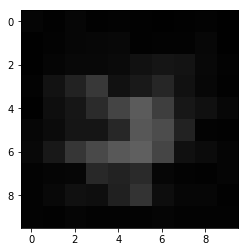

In [4]:
show(base)

### Implementierung des Faltungsoperators

In [5]:
def convolve(image, kernel):
    # Zero-Padding
    _image = np.pad(image, ((1, 1), (1, 1)), 'constant')

    output_image = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        # Cut out the part of the image which we consider for this iteration...
        window = _image[x:x+3, y:y+3] # image[x-1:x+2, y-1:y+2] but x=x+1, y=y+1 because of pad
        
        # ... and multiply it element-wise with the kernel, and sum up everything afterwards.
        output_image[x, y] = np.sum(np.multiply(window, kernel))

    return output_image

# 1) Mittelwertfilter

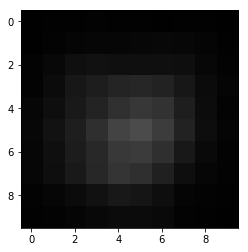

In [6]:
average_kernel = np.ones((3,3)) * 1/9
base_averaged = convolve(base, average_kernel)
show(base_averaged)

# 2) Grauwertspreizung & Sobel-Operatoren

### Grauwertspeizung
(Quelle: http://home.in.tum.de/~perzylo/Proseminar/Punktoperatoren.pdf)

In [7]:
def spread_gray_value(image, g_1=None, g_2=None, G=255):
    if g_1 is None:
        g_1 = np.min(image)
    if g_2 is None:
        g_2 = np.max(image)

    output = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        if value < g_1:
            output[x, y] = 0
        elif value > g_2:
            output[x, y] = G - 1
        else:
            output[x, y] = (G - 1)*(value - g_1)/(g_2 - g_1)
    return output

In [8]:
base_spread = spread_gray_value(base_averaged)

### Eingabebild nach Grauwertspreizung

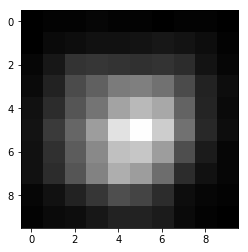

In [10]:
show(base_spread)

### Histogramme

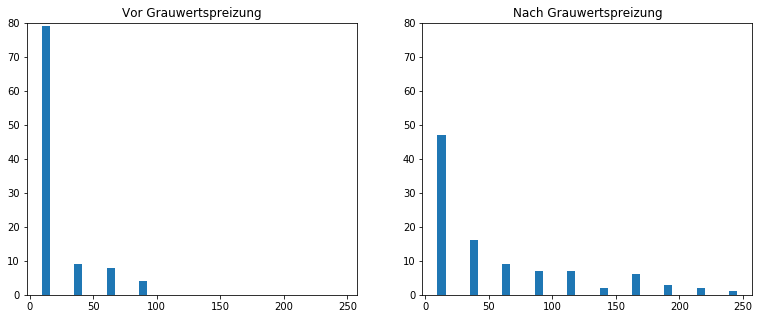

In [41]:
fig = plt.figure(figsize=(13, 5))

rows = 1
columns = 2

base_hist = fig.add_subplot(rows, columns, 1)
base_hist.set_title("Vor Grauwertspreizung")
plt.ylim([0,80])
plt.hist(base.flatten(), range=(0,255), align="mid", rwidth=.25)

base_hist_spread = fig.add_subplot(rows, columns, 2)
base_hist_spread.set_title("Nach Grauwertspreizung")
base_hist_spread.set_ybound(80)
plt.ylim([0,80])
plt.hist(base_spread.flatten(), range=(0,255), align="mid", rwidth=.25)

plt.show()

### Sobel-Operator in x-Richtung

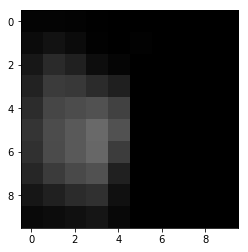

In [11]:
S_x = 0.25 * np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

x = convolve(base_spread, S_x)
show(x)

### Sobel-Operator in y-Richtung

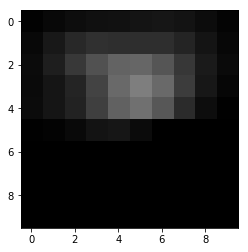

In [12]:
S_y = S_x.T

y = convolve(base_spread, S_y)
show(y)

# 3) Berechnung der Kanten (Sobel-Operator-Max)

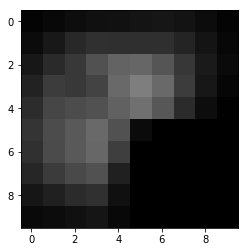

In [13]:
g = np.maximum(x, y)
show(g)

# 4) Darstellungen der einzelnen Schritte

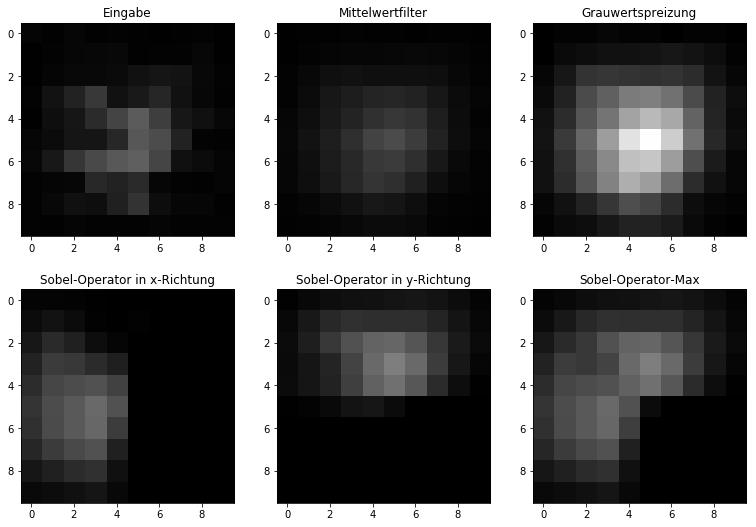

In [14]:
fig = plt.figure(figsize=(13, 9))

rows = 2
columns = 3

in_ = fig.add_subplot(rows, columns, 1)
in_.set_title("Eingabe")
plt.imshow(base, cmap="gray", norm=NoNorm())

avg = fig.add_subplot(rows, columns, 2)
avg.set_title("Mittelwertfilter")
plt.imshow(base_averaged, cmap="gray", norm=NoNorm())

spread = fig.add_subplot(rows, columns, 3)
spread.set_title("Grauwertspreizung")
plt.imshow(base_spread, cmap="gray", norm=NoNorm())

x_plt = fig.add_subplot(rows, columns, 4)
x_plt.set_title("Sobel-Operator in x-Richtung")
plt.imshow(x, cmap="gray", norm=NoNorm())

y_plt = fig.add_subplot(rows, columns, 5)
y_plt.set_title("Sobel-Operator in y-Richtung")
plt.imshow(y, cmap="gray", norm=NoNorm())

g_plt = fig.add_subplot(rows, columns, 6)
g_plt.set_title("Sobel-Operator-Max")
plt.imshow(g, cmap="gray", norm=NoNorm())